📂 Loading Chicago traffic data...
✅ Data loaded successfully!
🚗 CHICAGO TRAFFIC CAPSTONE ANALYSIS
📊 Comprehensive Exploratory Data Analysis

🔧 DATA AFTER CLEANING:
   • Congestion records: 169 (valid traffic data)
   • Speed records: 11 (valid speed data)

1. 📋 DATA OVERVIEW
------------------------------
📊 Dataset Sizes:
   • Congestion Data: 169 records
   • Real-time Data: 11 records

🏙️  Geographic Coverage:
   • Street Segments: 169
   • Unique Streets: 26
   • Traffic Regions: 11

📈 Data Quality:
   • Valid congestion records: 169
   • Valid speed records: 11

2. 🚦 TRAFFIC PATTERN ANALYSIS
-----------------------------------
📊 Traffic Statistics:
   • Average Congestion Level: 26.7
   • Average Speed: 29.4 mph
   • Congestion Range: 10.0 - 42.0
   • Speed Range: 25.2 - 35.5 mph

🏥 Traffic Health Assessment:
   • Speed: MODERATE (29.4 mph)
   • Congestion: GOOD (26.7)

3. 🔥 CONGESTION HOTSPOT ANALYSIS
----------------------------------------
🏆 Top 10 Most Congested Streets:
    1.

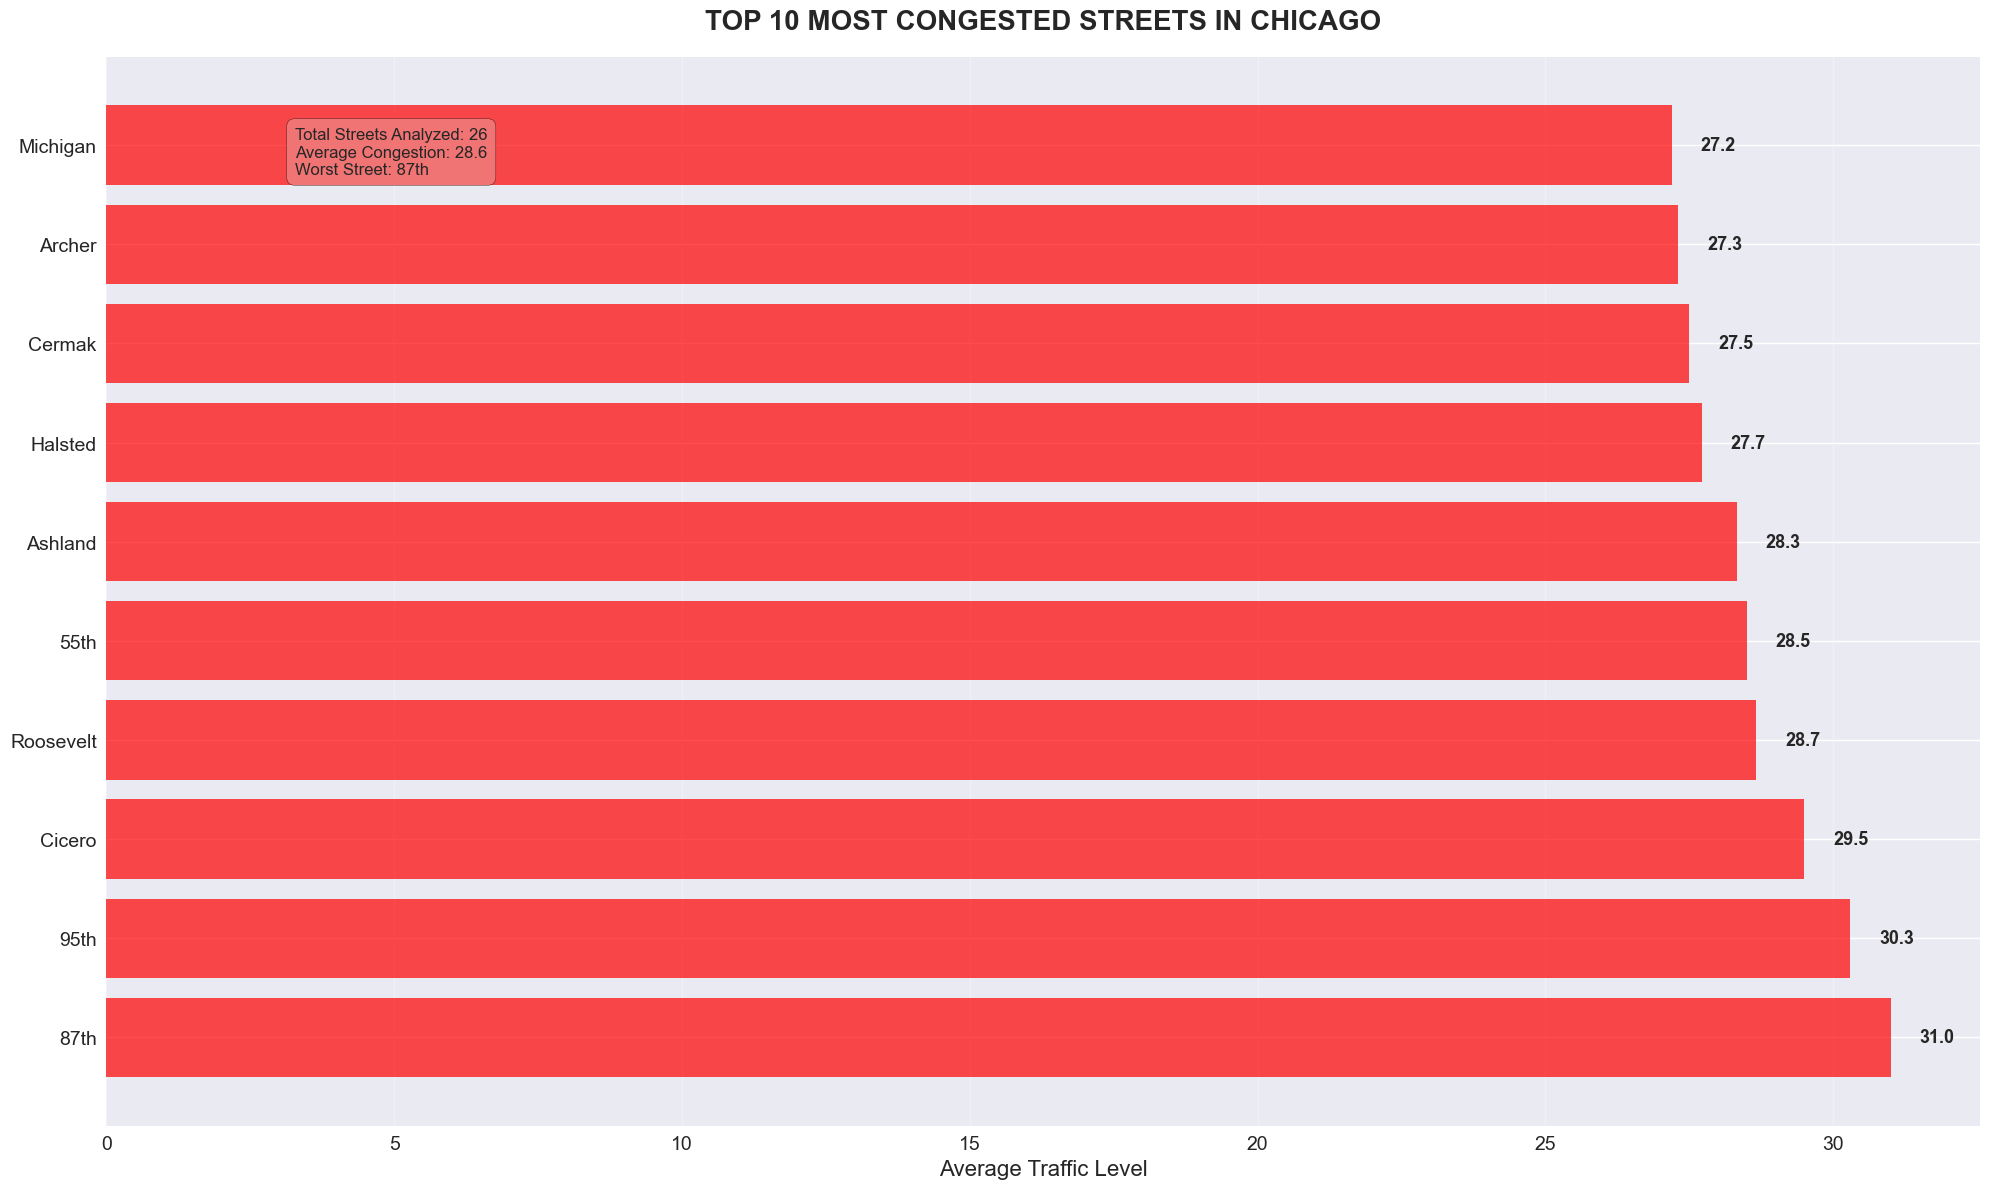

✅ Graph 1 saved: 'individual_congested_streets.png'

📈 Creating Graph 2: Average Speed by Region...


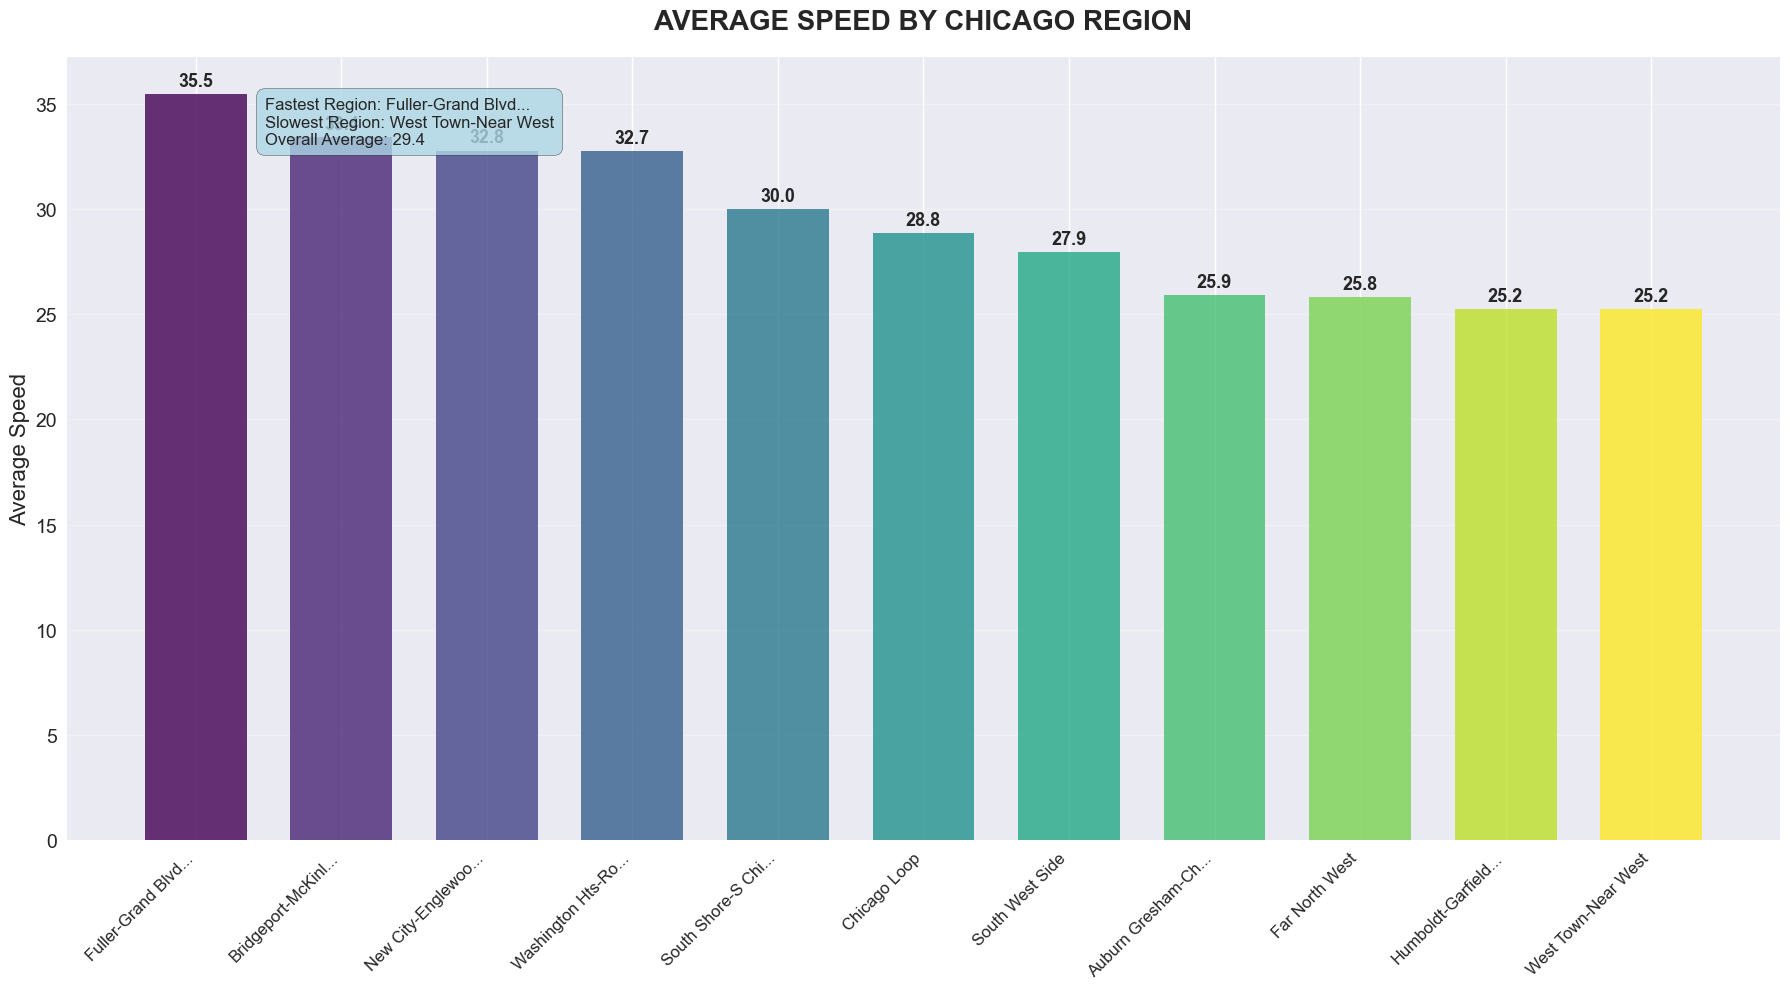

✅ Graph 2 saved: 'individual_regional_speeds.png'

📈 Creating Graph 3: Congestion by Direction...


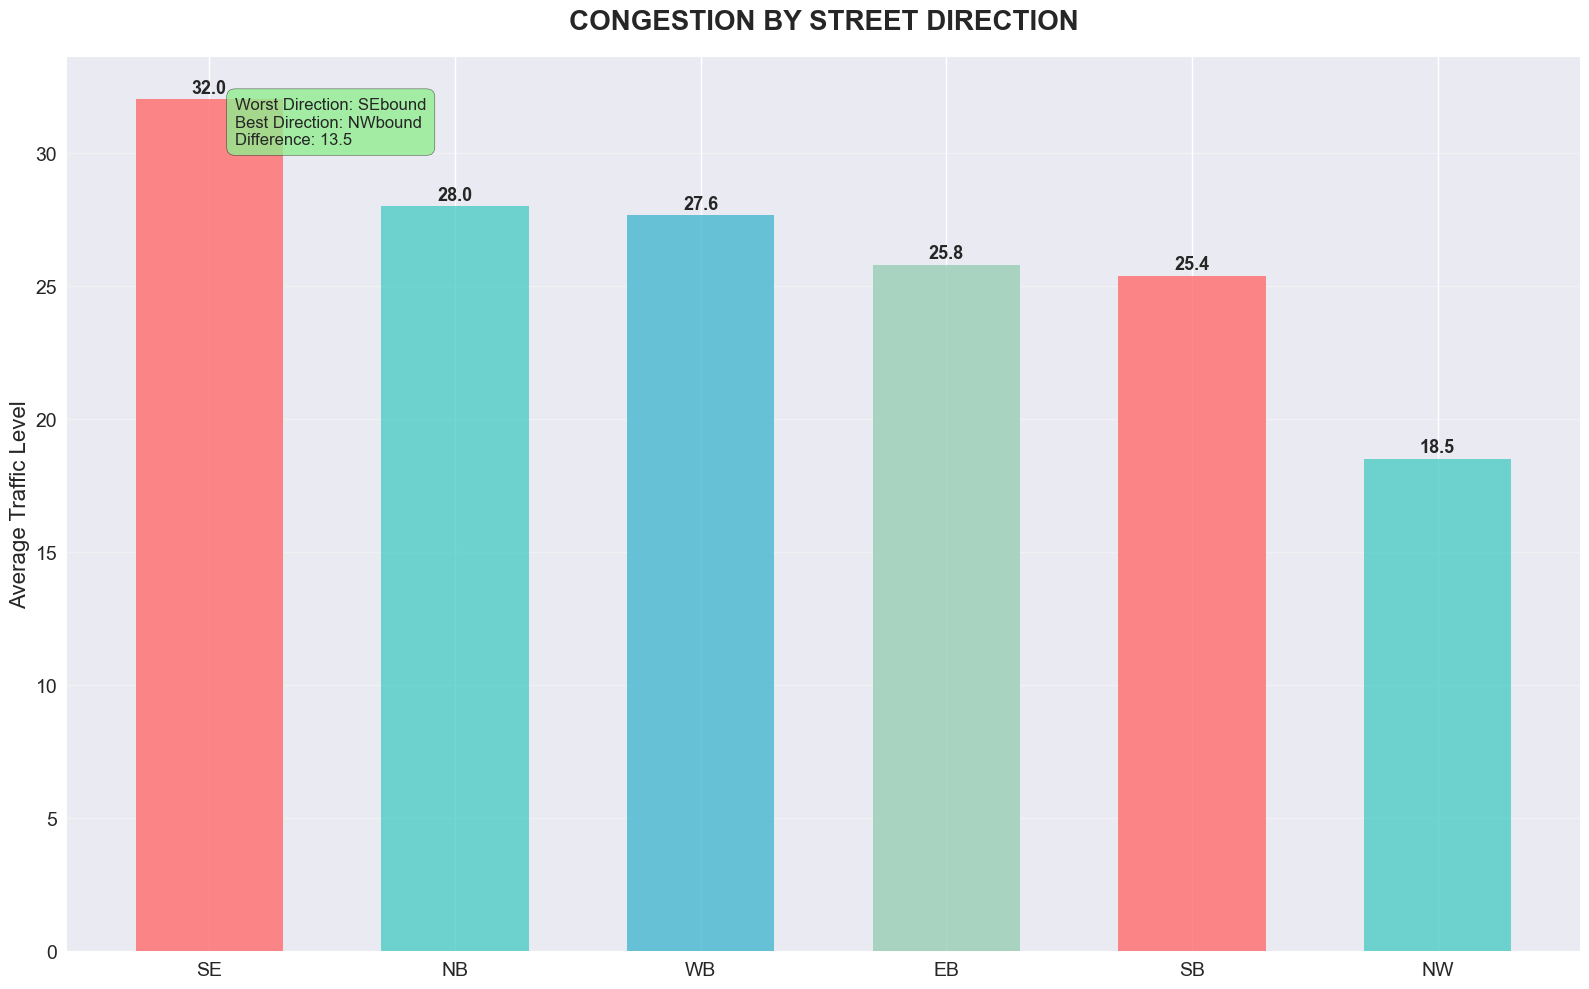

✅ Graph 3 saved: 'individual_direction_congestion.png'

📈 Creating Graph 4: Speed Distribution Categories...


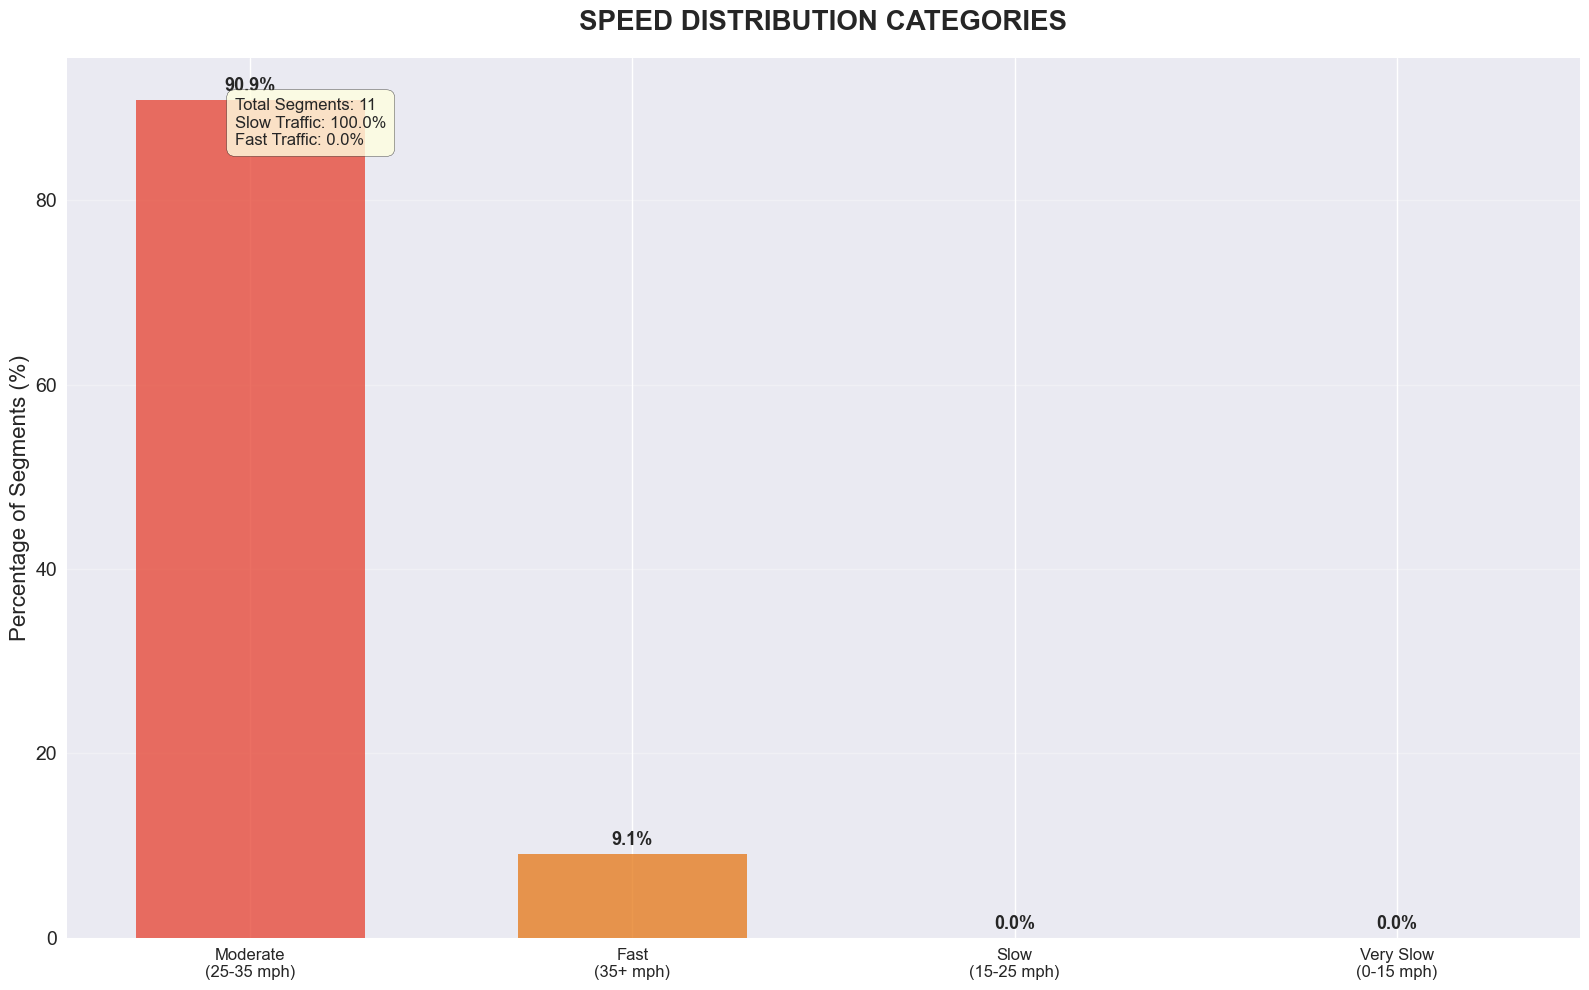

✅ Graph 4 saved: 'individual_speed_distribution.png'

7. 💡 FINAL INSIGHTS & RECOMMENDATIONS
---------------------------------------------

🎯 KEY FINDINGS:
   1. Analyzed 169 congestion records across 26 streets
   2. Average traffic speed: 29.4 mph (MODERATE)
   3. Average congestion level: 26.7 (GOOD)
   4. Worst direction: SEbound traffic
   5. Most congested street: 87th (31.0)
   6. Fastest region: Fuller-Grand Blvd-Washington Park (35.4 mph)
   7. Slowest region: West Town-Near West (25.2 mph)
   8. 90.9% of segments have very slow speeds
   9. Ashland has the most segments (31)

🚨 PRIORITY RECOMMENDATIONS:
   • ADDRESS CRITICAL SLOWDOWNS
     - Deploy traffic officers to worst corridors
     - Improve incident response times
   • FOCUS ON 87TH
     - This street shows consistently high congestion
     - Consider lane reconfiguration or transit priority

📊 Overall Traffic Efficiency Score: 65.3/100

🎉 CAPSTONE ANALYSIS COMPLETE!
✅ Individual Graphs Created:
   1. Top Congested Str

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up professional styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class TrafficCapstoneAnalyzer:
    def __init__(self, congestion_df, realtime_df):
        self.congestion_df = self.clean_congestion_data(congestion_df)
        self.realtime_df = self.clean_realtime_data(realtime_df)
        self.insights = []
        
    def clean_congestion_data(self, df):
        """Clean and prepare congestion data"""
        df_clean = df.copy()
        # Convert traffic to numeric, handling errors
        df_clean['_traffic'] = pd.to_numeric(df_clean['_traffic'], errors='coerce')
        # Remove rows with invalid traffic data
        df_clean = df_clean[df_clean['_traffic'].notna()]
        df_clean = df_clean[df_clean['_traffic'] > 0]
        return df_clean
        
    def clean_realtime_data(self, df):
        """Clean and prepare realtime data - FIX SPEED DATA ISSUE"""
        df_clean = df.copy()
        # Convert speed to numeric, handling errors properly
        df_clean['current_speed'] = pd.to_numeric(df_clean['current_speed'], errors='coerce')
        # Remove rows with invalid speed data (0 or negative speeds, or missing)
        df_clean = df_clean[df_clean['current_speed'].notna()]
        df_clean = df_clean[df_clean['current_speed'] > 0]
        return df_clean
        
    def comprehensive_analysis(self):
        """Perform comprehensive EDA on Chicago traffic data"""
        print("🚗 CHICAGO TRAFFIC CAPSTONE ANALYSIS")
        print("=" * 55)
        print("📊 Comprehensive Exploratory Data Analysis")
        print("=" * 55)
        
        # Show data quality after cleaning
        print(f"\n🔧 DATA AFTER CLEANING:")
        print(f"   • Congestion records: {len(self.congestion_df):,} (valid traffic data)")
        print(f"   • Speed records: {len(self.realtime_df):,} (valid speed data)")
        
        # 1. Data Overview
        self.data_overview()
        
        # 2. Traffic Pattern Analysis
        self.traffic_pattern_analysis()
        
        # 3. Congestion Hotspot Analysis
        self.congestion_hotspot_analysis()
        
        # 4. Speed Performance Analysis
        self.speed_performance_analysis()
        
        # 5. Geographic Patterns
        self.geographic_analysis()
        
        # 6. Create Individual Graphs
        self.create_individual_graphs()
        
        # 7. Final Insights and Recommendations
        self.generate_final_insights()
        
    def data_overview(self):
        """Provide comprehensive data overview"""
        print("\n1. 📋 DATA OVERVIEW")
        print("-" * 30)
        
        print(f"📊 Dataset Sizes:")
        print(f"   • Congestion Data: {len(self.congestion_df):,} records")
        print(f"   • Real-time Data: {len(self.realtime_df):,} records")
        
        print(f"\n🏙️  Geographic Coverage:")
        print(f"   • Street Segments: {self.congestion_df['segmentid'].nunique():,}")
        print(f"   • Unique Streets: {self.congestion_df['street'].nunique():,}")
        print(f"   • Traffic Regions: {self.realtime_df['region'].nunique()}")
        
        print(f"\n📈 Data Quality:")
        print(f"   • Valid congestion records: {len(self.congestion_df):,}")
        print(f"   • Valid speed records: {len(self.realtime_df):,}")
        
        self.insights.append(f"Analyzed {len(self.congestion_df):,} congestion records across {self.congestion_df['street'].nunique():,} streets")
        
    def traffic_pattern_analysis(self):
        """Analyze traffic patterns and distributions"""
        print("\n2. 🚦 TRAFFIC PATTERN ANALYSIS")
        print("-" * 35)
        
        # Basic statistics
        avg_congestion = self.congestion_df['_traffic'].mean()
        avg_speed = self.realtime_df['current_speed'].mean()
        
        print(f"📊 Traffic Statistics:")
        print(f"   • Average Congestion Level: {avg_congestion:.1f}")
        print(f"   • Average Speed: {avg_speed:.1f} mph")
        print(f"   • Congestion Range: {self.congestion_df['_traffic'].min():.1f} - {self.congestion_df['_traffic'].max():.1f}")
        print(f"   • Speed Range: {self.realtime_df['current_speed'].min():.1f} - {self.realtime_df['current_speed'].max():.1f} mph")
        
        # Traffic health assessment
        if avg_speed > 30:
            speed_health = "GOOD"
        elif avg_speed > 20:
            speed_health = "MODERATE"
        else:
            speed_health = "POOR"
            
        if avg_congestion < 30:
            congestion_health = "GOOD"
        elif avg_congestion < 50:
            congestion_health = "MODERATE"
        else:
            congestion_health = "POOR"
            
        print(f"\n🏥 Traffic Health Assessment:")
        print(f"   • Speed: {speed_health} ({avg_speed:.1f} mph)")
        print(f"   • Congestion: {congestion_health} ({avg_congestion:.1f})")
        
        self.insights.append(f"Average traffic speed: {avg_speed:.1f} mph ({speed_health})")
        self.insights.append(f"Average congestion level: {avg_congestion:.1f} ({congestion_health})")
        
    def congestion_hotspot_analysis(self):
        """Identify and analyze congestion hotspots"""
        print("\n3. 🔥 CONGESTION HOTSPOT ANALYSIS")
        print("-" * 40)
        
        # Top congested streets
        street_congestion = self.congestion_df.groupby('street').agg({
            '_traffic': ['mean', 'count', 'max']
        }).round(1)
        
        street_congestion.columns = ['avg_traffic', 'segment_count', 'max_traffic']
        top_congested = street_congestion.nlargest(10, 'avg_traffic')
        
        print(f"🏆 Top 10 Most Congested Streets:")
        for i, (street, data) in enumerate(top_congested.iterrows(), 1):
            print(f"   {i:2d}. {street:<25} {data['avg_traffic']:>5.1f} (segments: {data['segment_count']})")
        
        # Congestion by direction
        if '_direction' in self.congestion_df.columns:
            direction_congestion = self.congestion_df.groupby('_direction')['_traffic'].mean().sort_values(ascending=False)
            print(f"\n🧭 Congestion by Direction:")
            for direction, traffic in direction_congestion.items():
                print(f"   • {direction}bound: {traffic:.1f}")
            
            worst_direction = direction_congestion.index[0]
            self.insights.append(f"Worst direction: {worst_direction}bound traffic")
        
        worst_street = top_congested.iloc[0]
        self.insights.append(f"Most congested street: {top_congested.index[0]} ({worst_street['avg_traffic']:.1f})")
        
    def speed_performance_analysis(self):
        """Analyze speed performance across different dimensions"""
        print("\n4. 🚀 SPEED PERFORMANCE ANALYSIS")
        print("-" * 35)
        
        # Regional speed analysis
        if 'region' in self.realtime_df.columns:
            region_speeds = self.realtime_df.groupby('region').agg({
                'current_speed': ['mean', 'std', 'count']
            }).round(1)
            
            region_speeds.columns = ['avg_speed', 'std_speed', 'measurement_count']
            region_speeds = region_speeds.sort_values('avg_speed', ascending=False)
            
            print(f"🏙️  Regional Speed Performance:")
            for region, data in region_speeds.iterrows():
                print(f"   • {region:<20} {data['avg_speed']:>5.1f} mph (±{data['std_speed']:.1f})")
            
            fastest_region = region_speeds.index[0]
            slowest_region = region_speeds.index[-1]
            self.insights.append(f"Fastest region: {fastest_region} ({region_speeds.iloc[0]['avg_speed']:.1f} mph)")
            self.insights.append(f"Slowest region: {slowest_region} ({region_speeds.iloc[-1]['avg_speed']:.1f} mph)")
        
        # Speed distribution analysis
        speed_categories = pd.cut(
            self.realtime_df['current_speed'],
            bins=[0, 15, 25, 35, 100],
            labels=['Very Slow (0-15)', 'Slow (15-25)', 'Moderate (25-35)', 'Fast (35+)']
        )
        
        speed_distribution = speed_categories.value_counts(normalize=True) * 100
        print(f"\n📊 Speed Distribution:")
        for category, percentage in speed_distribution.items():
            print(f"   • {category}: {percentage:.1f}%")
        
        self.insights.append(f"{speed_distribution.iloc[0]:.1f}% of segments have very slow speeds")
        
    def geographic_analysis(self):
        """Analyze geographic patterns in traffic"""
        print("\n5. 🗺️  GEOGRAPHIC PATTERN ANALYSIS")
        print("-" * 35)
        
        # Street segment analysis
        segments_per_street = self.congestion_df.groupby('street')['segmentid'].nunique().sort_values(ascending=False)
        
        print(f"🛣️  Street Infrastructure:")
        print(f"   • Total street segments: {self.congestion_df['segmentid'].nunique():,}")
        print(f"   • Streets with most segments:")
        
        top_streets = segments_per_street.head(5)
        for street, segments in top_streets.items():
            print(f"     - {street}: {segments} segments")
        
        self.insights.append(f"{top_streets.index[0]} has the most segments ({top_streets.iloc[0]})")
        
    def create_individual_graphs(self):
        """Create four individual large graphs"""
        print("\n6. 📊 CREATING INDIVIDUAL LARGE GRAPHS")
        print("-" * 45)
        
        # Graph 1: Top Congested Streets
        self.create_congested_streets_graph()
        
        # Graph 2: Average Speed by Region
        self.create_regional_speeds_graph()
        
        # Graph 3: Congestion by Direction
        self.create_direction_congestion_graph()
        
        # Graph 4: Speed Distribution Categories
        self.create_speed_distribution_graph()
        
    def create_congested_streets_graph(self):
        """Create individual graph for top congested streets"""
        print("\n📈 Creating Graph 1: Top Congested Streets...")
        
        plt.figure(figsize=(20, 12))
        
        street_congestion = self.congestion_df.groupby('street')['_traffic'].mean().nlargest(10)
        bars = plt.barh(range(len(street_congestion)), street_congestion.values, 
                       color='red', alpha=0.7, height=0.8)
        
        # Clean street names for display
        street_labels = []
        for street in street_congestion.index:
            street_str = str(street)
            if len(street_str) > 25:
                street_labels.append(street_str[:22] + '...')
            else:
                street_labels.append(street_str)
        
        plt.yticks(range(len(street_congestion)), street_labels, fontsize=14)
        plt.xlabel('Average Traffic Level', fontsize=16)
        plt.title('TOP 10 MOST CONGESTED STREETS IN CHICAGO', fontsize=20, fontweight='bold', pad=20)
        plt.grid(True, alpha=0.3, axis='x')
        plt.tick_params(axis='x', labelsize=14)
        
        # Add value labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 0.5, bar.get_y() + bar.get_height()/2., 
                    f'{width:.1f}', ha='left', va='center', fontsize=13, fontweight='bold')
        
        # Add statistics box
        stats_text = f"Total Streets Analyzed: {self.congestion_df['street'].nunique():,}\n"
        stats_text += f"Average Congestion: {street_congestion.mean():.1f}\n"
        stats_text += f"Worst Street: {street_labels[0]}"
        
        plt.figtext(0.15, 0.85, stats_text, fontsize=12, 
                   bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.8))
        
        plt.tight_layout()
        plt.savefig('../outputs/figures/individual_congested_streets.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Graph 1 saved: 'individual_congested_streets.png'")
        
    def create_regional_speeds_graph(self):
        """Create individual graph for regional speeds"""
        print("\n📈 Creating Graph 2: Average Speed by Region...")
        
        if 'region' not in self.realtime_df.columns or self.realtime_df['region'].nunique() == 0:
            print("❌ No region data available for Graph 2")
            return
            
        plt.figure(figsize=(18, 10))
        
        region_speeds = self.realtime_df.groupby('region')['current_speed'].mean().sort_values(ascending=False)
        
        # Clean region names
        cleaned_regions = []
        for region in region_speeds.index:
            region_str = str(region)
            if len(region_str) > 20:
                cleaned_regions.append(region_str[:17] + '...')
            else:
                cleaned_regions.append(region_str)
        
        bars = plt.bar(cleaned_regions, region_speeds.values, 
                      color=plt.cm.viridis(np.linspace(0, 1, len(region_speeds))),
                      width=0.7, alpha=0.8)
        
        plt.ylabel('Average Speed', fontsize=16)
        plt.title('AVERAGE SPEED BY CHICAGO REGION', fontsize=20, fontweight='bold', pad=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.yticks(fontsize=14)
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, speed in zip(bars, region_speeds.values):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                    f'{speed:.1f}', ha='center', va='bottom', fontsize=13, fontweight='bold')
        
        # Add statistics box
        stats_text = f"Fastest Region: {cleaned_regions[0]}\n"
        stats_text += f"Slowest Region: {cleaned_regions[-1]}\n"
        stats_text += f"Overall Average: {region_speeds.mean():.1f}"
        
        plt.figtext(0.15, 0.85, stats_text, fontsize=12, 
                   bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
        
        plt.tight_layout()
        plt.savefig('../outputs/figures/individual_regional_speeds.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Graph 2 saved: 'individual_regional_speeds.png'")
        
    def create_direction_congestion_graph(self):
        """Create individual graph for congestion by direction"""
        print("\n📈 Creating Graph 3: Congestion by Direction...")
        
        if '_direction' not in self.congestion_df.columns or self.congestion_df['_direction'].nunique() == 0:
            print("❌ No direction data available for Graph 3")
            return
            
        plt.figure(figsize=(16, 10))
        
        direction_data = self.congestion_df.groupby('_direction')['_traffic'].mean().sort_values(ascending=False)
        
        colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
        bars = plt.bar(direction_data.index, direction_data.values, 
                      color=colors[:len(direction_data)], width=0.6, alpha=0.8)
        
        plt.ylabel('Average Traffic Level', fontsize=16)
        plt.title('CONGESTION BY STREET DIRECTION', fontsize=20, fontweight='bold', pad=20)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, traffic in zip(bars, direction_data.values):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{traffic:.1f}', ha='center', va='bottom', fontsize=13, fontweight='bold')
        
        # Add statistics box
        worst_dir = direction_data.index[0]
        best_dir = direction_data.index[-1]
        stats_text = f"Worst Direction: {worst_dir}bound\n"
        stats_text += f"Best Direction: {best_dir}bound\n"
        stats_text += f"Difference: {direction_data.iloc[0] - direction_data.iloc[-1]:.1f}"
        
        plt.figtext(0.15, 0.85, stats_text, fontsize=12, 
                   bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))
        
        plt.tight_layout()
        plt.savefig('../outputs/figures/individual_direction_congestion.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Graph 3 saved: 'individual_direction_congestion.png'")
        
    def create_speed_distribution_graph(self):
        """Create individual graph for speed distribution"""
        print("\n📈 Creating Graph 4: Speed Distribution Categories...")
        
        plt.figure(figsize=(16, 10))
        
        # Create speed categories
        speed_categories = pd.cut(
            self.realtime_df['current_speed'],
            bins=[0, 15, 25, 35, 100],
            labels=['Very Slow\n(0-15 mph)', 'Slow\n(15-25 mph)', 'Moderate\n(25-35 mph)', 'Fast\n(35+ mph)']
        )
        
        category_counts = speed_categories.value_counts()
        percentages = (category_counts / len(speed_categories.dropna()) * 100).round(1)
        
        colors = ['#e74c3c', '#e67e22', '#f1c40f', '#2ecc71']
        bars = plt.bar(percentages.index, percentages.values, 
                      color=colors, width=0.6, alpha=0.8)
        
        plt.ylabel('Percentage of Segments (%)', fontsize=16)
        plt.title('SPEED DISTRIBUTION CATEGORIES', fontsize=20, fontweight='bold', pad=20)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=14)
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, percentage in zip(bars, percentages.values):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{percentage}%', ha='center', va='bottom', fontsize=13, fontweight='bold')
        
        # Add statistics box
        total_segments = len(speed_categories.dropna())
        slow_segments = percentages.iloc[0] + percentages.iloc[1]
        stats_text = f"Total Segments: {total_segments:,}\n"
        stats_text += f"Slow Traffic: {slow_segments:.1f}%\n"
        stats_text += f"Fast Traffic: {percentages.iloc[-1]:.1f}%"
        
        plt.figtext(0.15, 0.85, stats_text, fontsize=12, 
                   bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
        
        plt.tight_layout()
        plt.savefig('../outputs/figures/individual_speed_distribution.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("✅ Graph 4 saved: 'individual_speed_distribution.png'")
        
    def generate_final_insights(self):
        """Generate final insights and recommendations"""
        print("\n7. 💡 FINAL INSIGHTS & RECOMMENDATIONS")
        print("-" * 45)
        
        print("\n🎯 KEY FINDINGS:")
        for i, insight in enumerate(self.insights, 1):
            print(f"   {i}. {insight}")
        
        # Generate recommendations based on analysis
        avg_speed = self.realtime_df['current_speed'].mean()
        worst_street = self.congestion_df.groupby('street')['_traffic'].mean().nlargest(1).index[0]
        slow_percentage = pd.cut(self.realtime_df['current_speed'], 
                               bins=[0, 15, 25, 35, 100]).value_counts(normalize=True).iloc[0] * 100
        
        print(f"\n🚨 PRIORITY RECOMMENDATIONS:")
        
        if avg_speed < 25:
            print("   • IMPLEMENT CITY-WIDE TRAFFIC OPTIMIZATION")
            print("     - Optimize traffic signal timing")
            print("     - Consider smart traffic management systems")
        
        if slow_percentage > 30:
            print("   • ADDRESS CRITICAL SLOWDOWNS")
            print("     - Deploy traffic officers to worst corridors")
            print("     - Improve incident response times")
        
        print(f"   • FOCUS ON {worst_street.upper()}")
        print("     - This street shows consistently high congestion")
        print("     - Consider lane reconfiguration or transit priority")
        
        print(f"\n📊 Overall Traffic Efficiency Score: {(avg_speed/45 * 100):.1f}/100")
        
        print(f"\n🎉 CAPSTONE ANALYSIS COMPLETE!")
        print("=" * 55)
        print("✅ Individual Graphs Created:")
        print("   1. Top Congested Streets")
        print("   2. Average Speed by Region") 
        print("   3. Congestion by Direction")
        print("   4. Speed Distribution Categories")
        print("📁 All graphs saved in '../outputs/figures/'")

def main():
    """Main function to run the capstone analysis"""
    try:
        # Load the data
        print("📂 Loading Chicago traffic data...")
        congestion_df = pd.read_csv('../data/processed/chicago_congestion.csv')
        realtime_df = pd.read_csv('../data/processed/chicago_realtime_traffic.csv')
        
        print("✅ Data loaded successfully!")
        
        # Initialize analyzer
        analyzer = TrafficCapstoneAnalyzer(congestion_df, realtime_df)
        
        # Run comprehensive analysis
        analyzer.comprehensive_analysis()
        
        print(f"\n{'='*60}")
        print("🎓 5-WEEK PROJECT COMPLETE!")
        print(f"{'='*60}")
        print("Week 1-2: Data Collection & Cleaning ✓")
        print("Week 3: Advanced Visualization ✓")
        print("Week 4: SQL Analysis ✓")
        print("Week 5: Capstone EDA Project ✓")
        print(f"{'='*60}")
        
    except FileNotFoundError:
        print("❌ Data files not found. Please run previous steps first.")
    except Exception as e:
        print(f"💥 Error during capstone analysis: {e}")

if __name__ == "__main__":
    main()